# Image compression through Singular Value Decomposition

Load a picture as a 3-dimensional `np.array`

In [46]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [8, 8]

# write here the import path of the image
image_path = './TarantulaNebula.jpg'

In [47]:
A = imread(image_path)
A.shape

(567, 630, 3)

Visualize the picture

(-0.5, 629.5, 566.5, -0.5)

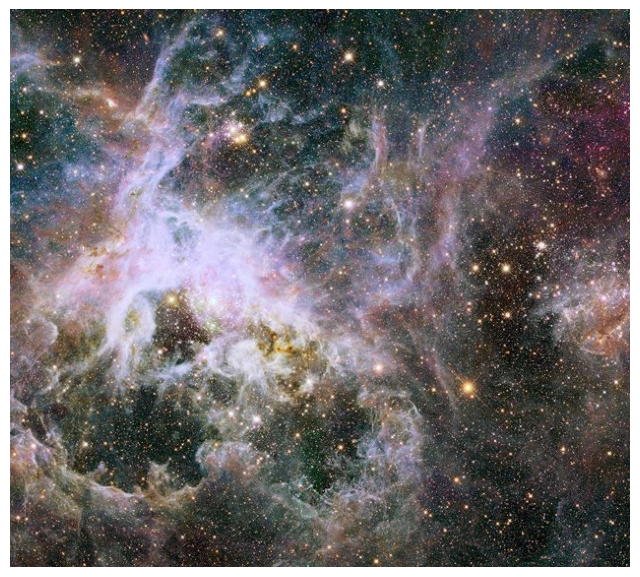

In [48]:
img = plt.imshow(A)
plt.axis('off')

Convert the picture to gray-scale and visualize it.

(-0.5, 629.5, 566.5, -0.5)

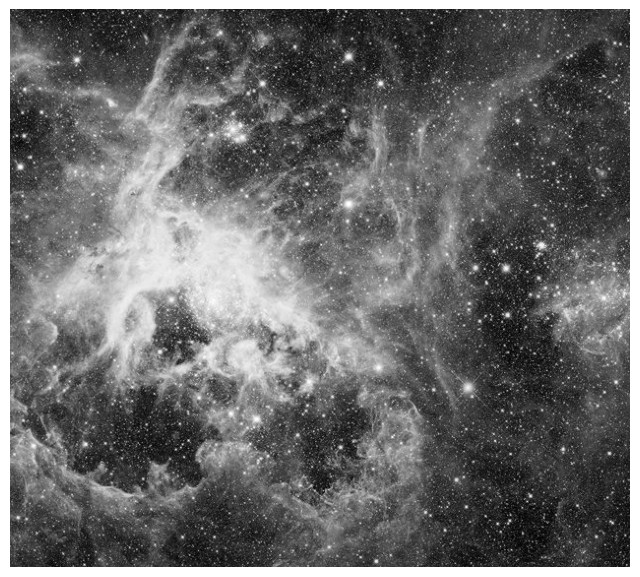

In [49]:
# compute the mean of the image channels
A_grayscale = A.mean(axis=2)
img = plt.imshow(A_grayscale, cmap='gray')
plt.axis('off')

What is the picture size?

In [50]:
f'The image is {A.shape[0]} by {A.shape[1]} pixels'

'The image is 567 by 630 pixels'

Perform the SVD decomposition

In [51]:
U, s, VT = np.linalg.svd(A_grayscale, full_matrices=False)

print(U.shape, s.shape, VT.shape)

(567, 567) (567,) (567, 630)


Plot the trend of
- the singular values $\sigma_k$
- the cumulate fraction of singular values: $\frac{\sum_{i=1}^{k} \sigma_i}{\sum_{i=1}^{q} \sigma_i}$
- the fraction of the "explained variance": $\frac{\sum_{i=1}^{k} \sigma_i^2}{\sum_{i=1}^{q} \sigma_i^2}$

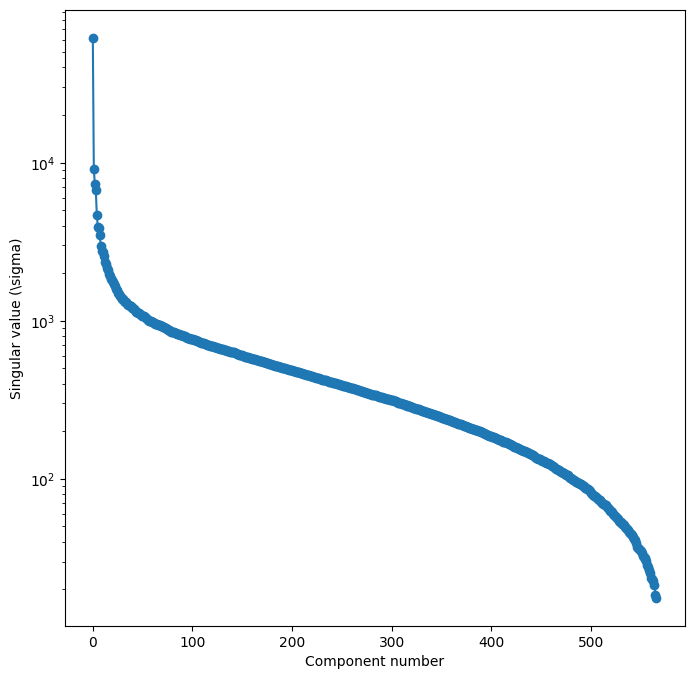

In [60]:
# plot the singular values
plt.plot(s, 'o-')
plt.yscale('log')
plt.xlabel('Component number')
plt.ylabel('Singular value (\sigma)')
plt.show()

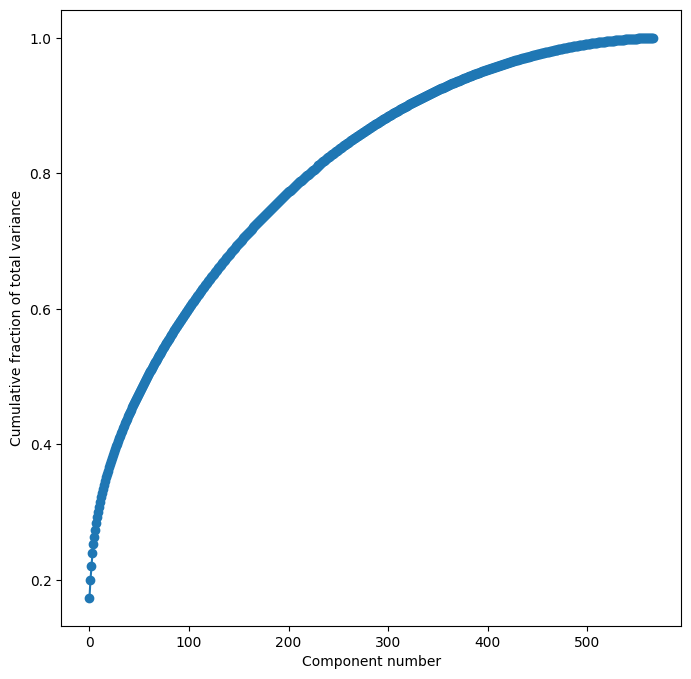

In [61]:
cumsum_s = np.cumsum(s)
cumulative_fraction = cumsum_s / cumsum_s[-1]

plt.plot(cumulative_fraction, 'o-')
plt.xlabel('Component number')
plt.ylabel('Cumulative fraction of total variance')
plt.show()


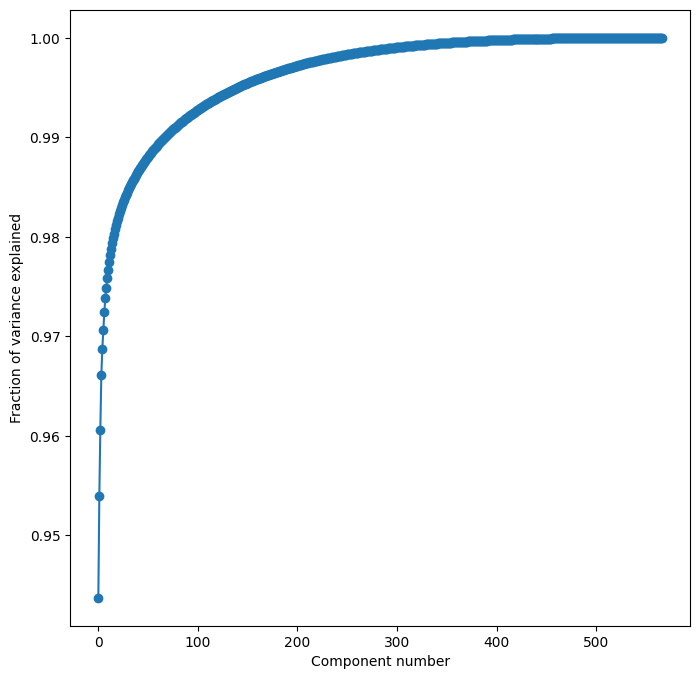

In [62]:
cumsum_square_s = np.cumsum(s ** 2)
explained_variance = np.sqrt(cumsum_square_s / cumsum_square_s[-1])

plt.plot(explained_variance, 'o-')
plt.xlabel('Component number')
plt.ylabel('Fraction of variance explained')
plt.show()

Visualize the best rank-$k$ matrices, for $k$ = 1, 5, 10, 50, 100, 500

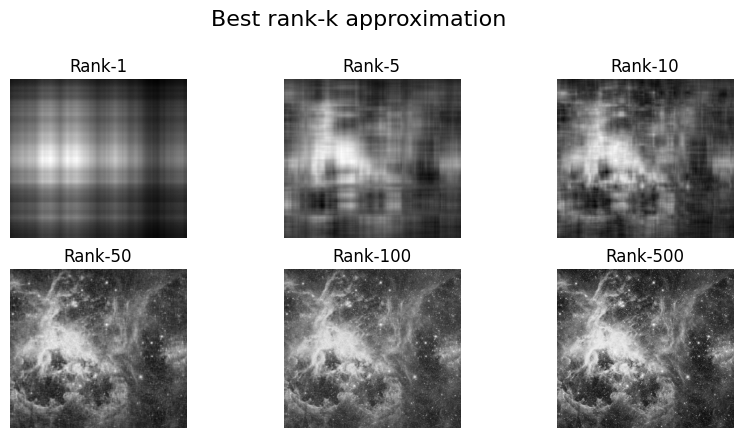

In [55]:
k_values = [1, 5, 10, 50, 100, 500]

fig = plt.figure(figsize=(10, 7)) 
fig.suptitle('Best rank-k approximation', fontsize=16)
rows = 3
columns = 3

for i, k in enumerate(k_values):
    A_k = U[:, :k] @ np.diag(s[:k]) @ VT[:k, :]
    fig.add_subplot(rows, columns, i+1) 
    plt.imshow(A_k, cmap='gray')
    title = f'Rank-{k}'
    plt.title(title)
    plt.axis('off')


Visualize the $k$-th rank-1 matix, for $k$ = 1,2,...,6

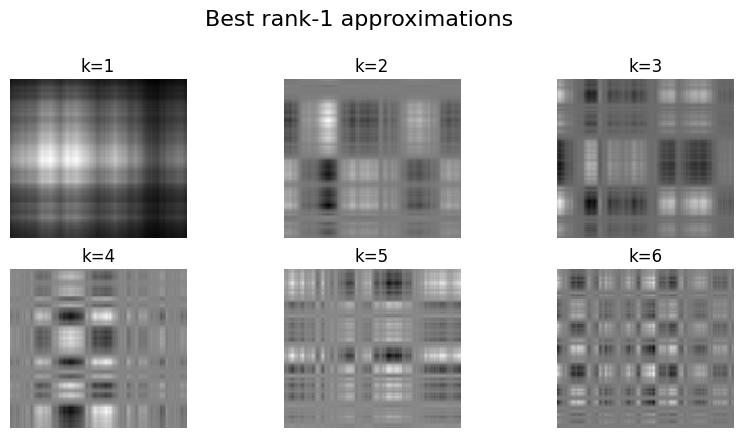

In [56]:
k_values = range(1, 7)
fig = plt.figure(figsize=(10, 7))
fig.suptitle('Best rank-1 approximations', fontsize=16)
rows = 3
columns = 3

for i, k in enumerate(k_values):
    fig.add_subplot(rows, columns, i+1) 
    plt.imshow(U[:, k-1:k] @ np.diag(s[k-1:k]) @ VT[k-1:k, :], cmap='gray')
    title = f'k={k}'
    plt.title(title)
    plt.axis('off')

## Randomized SVD

Implement now a function that computes the randomized SVD of rank $k$ of a generic matrix $A$.

In [57]:
def randomized_SVD(A, k):
    m, n = A.shape
    G = np.random.randn(n, k)
    Y = A @ G
    Q, _ = np.linalg.qr(Y)
    B = Q.T @ A
    U_tilde, S, VT = np.linalg.svd(B, full_matrices=False)
    U = Q @ U_tilde
    return U, S, VT

Set $k=100$ and compute the randomized SVD of the picture used above.

In [58]:
k = 100
U_, s_, VT_ = randomized_SVD(A_grayscale, k)

Plot the approximate singular values, their cumulate values and their cumulate squares, with a comparison of the ones obtained with the "exact" (i.e. non randomized) SVD.

In [100]:
def autoscale_y(ax,margin=0.1):
    """This function rescales the y-axis based on the data that is visible given the current xlim of the axis.
    ax -- a matplotlib axes object
    margin -- the fraction of the total height of the y-data to pad the upper and lower ylims"""

    import numpy as np

    def get_bottom_top(line):
        xd = line.get_xdata()
        yd = line.get_ydata()
        lo,hi = ax.get_xlim()
        y_displayed = yd[((xd>lo) & (xd<hi))]
        h = np.max(y_displayed) - np.min(y_displayed)
        bot = np.min(y_displayed)-margin*h
        top = np.max(y_displayed)+margin*h
        return bot,top

    lines = ax.get_lines()
    bot,top = np.inf, -np.inf

    for line in lines:
        new_bot, new_top = get_bottom_top(line)
        if new_bot < bot: bot = new_bot
        if new_top > top: top = new_top

    ax.set_ylim(bot,top)

C:\Users\nrtc\AppData\Local\Temp\ipykernel_10088\1050101249.py:26: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(bot,top)


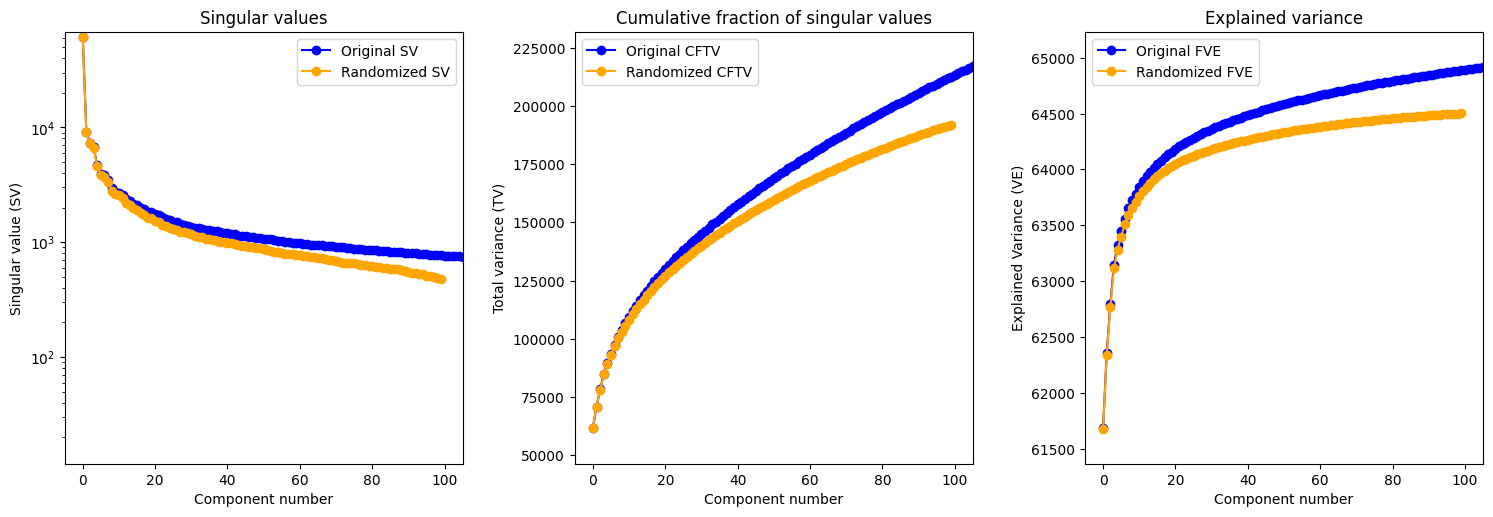

In [101]:
fig, axes = plt.subplots(1, 3, figsize=(16,6))
fig.tight_layout(pad=5.0)
axes = axes.flatten()

axes[0].plot(s, 'o-', color='blue', label='Original SV')
axes[0].plot(s_, 'o-', color='orange', label='Randomized SV')
axes[0].set_yscale('log')
axes[0].set_xlim(-5, 105)
autoscale_y(axes[0])
axes[0].set_xlabel('Component number')
axes[0].set_ylabel('Singular value (SV)')
axes[0].set_title('Singular values')
axes[0].legend()

randomized_cftv = np.cumsum(s_)
axes[1].plot(cumsum_s, 'o-', color='blue', label='Original CFTV')
axes[1].plot(randomized_cftv, 'o-', color='orange', label='Randomized CFTV')
axes[1].set_xlim(-5, 105)
autoscale_y(axes[1])
axes[1].set_xlabel('Component number')
axes[1].set_ylabel('Total variance (TV)')
axes[1].set_title('Cumulative fraction of singular values')
axes[1].legend()

randomized_fve = np.sqrt(np.cumsum(s_ ** 2))
cumsum_square_s_sqrt = np.sqrt(cumsum_square_s)
axes[2].plot(cumsum_square_s_sqrt, 'o-', color='blue', label='Original FVE')
axes[2].plot(randomized_fve, 'o-', color='orange', label='Randomized FVE')
axes[2].set_xlim(-5, 105)
autoscale_y(axes[2])
axes[2].set_xlabel('Component number')
axes[2].set_ylabel('Explained Variance (VE)')
axes[2].set_title('Explained variance')
axes[2].legend()

Compare the original picture with the best rank-$k$ matrix obtained through SVD and the best rank-$k$ matrix obtained through randomized SVD.

Text(0.5, 1.0, 'Randomized rank-100 approximation')

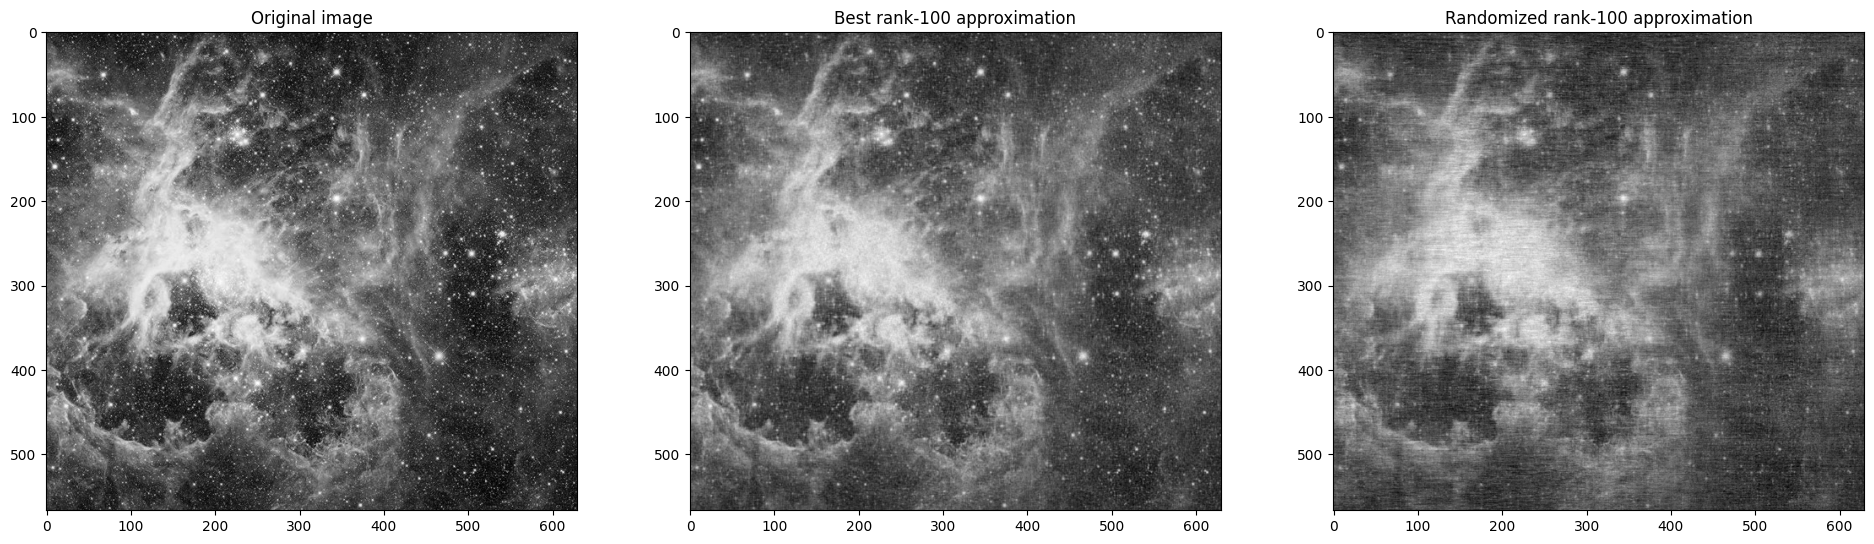

In [85]:
fig, axes = plt.subplots(1, 3, figsize=(20,20))
fig.tight_layout(pad=5.0)
axes = axes.flatten()

axes[0].imshow(A_grayscale, cmap='gray')
axes[0].set_title('Original image')

axes[1].imshow(U[:, :k] @ np.diag(s[:k]) @ VT[:k, :], cmap='gray')
axes[1].set_title('Best rank-100 approximation')

axes[2].imshow(U_[:, :k] @ np.diag(s_[:k]) @ VT_[:k, :], cmap='gray')
axes[2].set_title('Randomized rank-100 approximation')